### A very basic analysis of arrest and commitment data of black girls in 2018-19 for the state of Florida, USA

#### Library import

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%inline matplotlib

UsageError: Line magic function `%inline` not found.


#### Basic data pre-processing

In [7]:
arr_comm = pd.read_excel('arrest-and-commitment-for-black-girls-2018-19.xlsx')
arr_comm = arr_comm.iloc[:-2, :-2]
total_values = arr_comm.iloc[-1].to_dict()
arr_comm = arr_comm.iloc[:-1]
arr_comm.columns = ['county', 'percent_black_girls_in_gen_pop', 'arrest_n', 'arrest_percent_black', 'commitment_n', 'commitment_percent_black']
arr_comm['percent_non_black_girls_in_gen_pop'] = 1 - arr_comm['percent_black_girls_in_gen_pop']
arr_comm['arrest_percent_non_black']           = 1 - arr_comm['arrest_percent_black']
arr_comm['arrest_n_black']                     = round(arr_comm['arrest_n'] * arr_comm['arrest_percent_black'])
arr_comm['arrest_n_non_black']                 = round(arr_comm['arrest_n'] * arr_comm['arrest_percent_non_black'])
arr_comm['commitment_percent_non_black']       = 1 - arr_comm['commitment_percent_black']
arr_comm['commitment_n_black']                 = round(arr_comm['commitment_n'] * arr_comm['commitment_percent_black'])
arr_comm['commitment_n_non_black']             = round(arr_comm['commitment_n'] * arr_comm['commitment_percent_non_black'])

In [8]:
arr_comm.head()

,county,percent_black_girls_in_gen_pop,arrest_n,arrest_percent_black,commitment_n,commitment_percent_black,percent_non_black_girls_in_gen_pop,arrest_percent_non_black,arrest_n_black,arrest_n_non_black,commitment_percent_non_black,commitment_n_black,commitment_n_non_black
0,Alachua,0.341779,137.0,0.744526,12.0,0.92,0.658221,0.255474,102.0,35.0,0.08,11.0,1.0
1,Baker,0.130720,24.0,0.375000,1.0,0.00,0.869280,0.625000,9.0,15.0,1.00,0.0,1.0
2,Bay,0.130961,124.0,0.362903,3.0,1.00,0.869039,0.637097,45.0,79.0,0.00,3.0,0.0
3,Bradford,0.227002,17.0,0.588235,1.0,0.00,0.772998,0.411765,10.0,7.0,1.00,0.0,1.0
4,Brevard,0.148395,194.0,0.381443,11.0,0.36,0.851605,0.618557,74.0,120.0,0.64,4.0,7.0


In [9]:
arr_comm.isna().sum()

county                                 0
percent_black_girls_in_gen_pop         0
arrest_n                               0
arrest_percent_black                   0
commitment_n                           0
commitment_percent_black              21
percent_non_black_girls_in_gen_pop     0
arrest_percent_non_black               0
arrest_n_black                         0
arrest_n_non_black                     0
commitment_percent_non_black          21
commitment_n_black                    21
commitment_n_non_black                21
dtype: int64

#### Utility functions

In [10]:
def clean_df(df, col):
    df = df.dropna(axis=0).reset_index(drop=True)
    df = df[df[col] > 0].reset_index(drop=True)
    
    return df

In [11]:
def plot_graph(arr_comm, col, limit, title1, title2):
    temp = clean_df(arr_comm, col)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    plt.subplots_adjust(wspace=0.5)
    temp.sort_values([col], ascending=True).head(limit).plot(title=title1, kind='bar', ax=axes[0], x='county', y=col, grid=True)
    temp.sort_values([col], ascending=False).head(limit).plot(title=title2, kind='bar', ax=axes[1], x='county', y=col, grid=True)
    plt.show()

In [12]:
limit = 10

#### Plots of maximum and minimum counties ( the minimum and maximum values are set by the limit variable in the previous cell) for:<br>a. percentage of black girls in general population <br>b. no. of arrests <br>c. percentage of black girls arrested<br>d. no. of commitments<br>e. percentage of commitments among black girls <br><br>In identifying the counties, empty rows and those with value 0 have been ignored. 


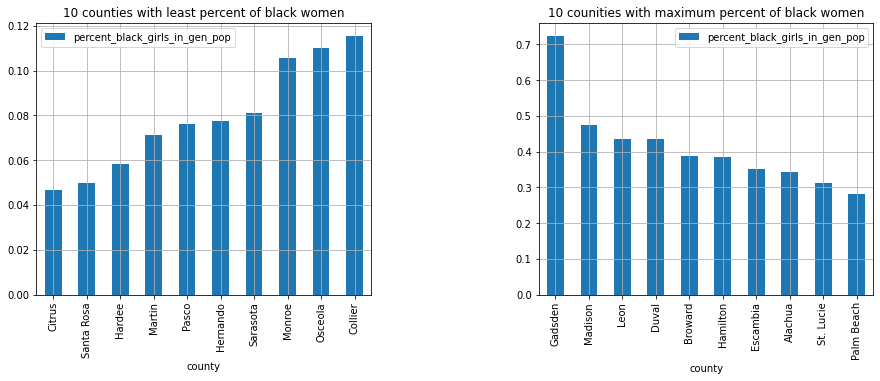

In [13]:
plot_graph(arr_comm, 'percent_black_girls_in_gen_pop', limit, f'{limit} counties with least percent of black women',f'{limit} counities with maximum percent of black women')

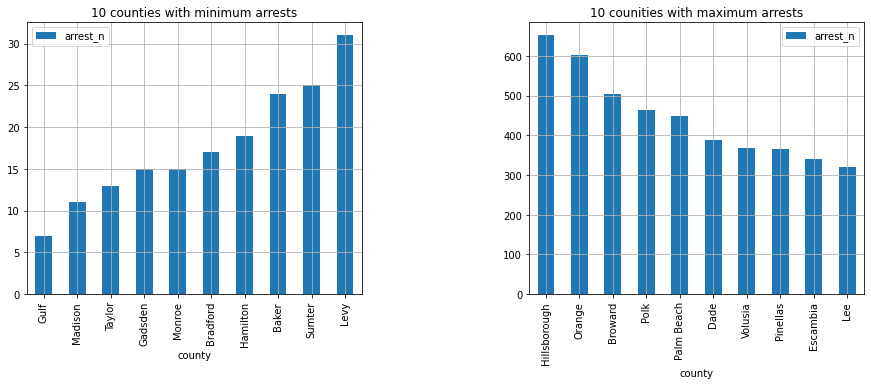

In [14]:
plot_graph(arr_comm, 'arrest_n', limit, f'{limit} counties with minimum arrests',f'{limit} counities with maximum arrests')

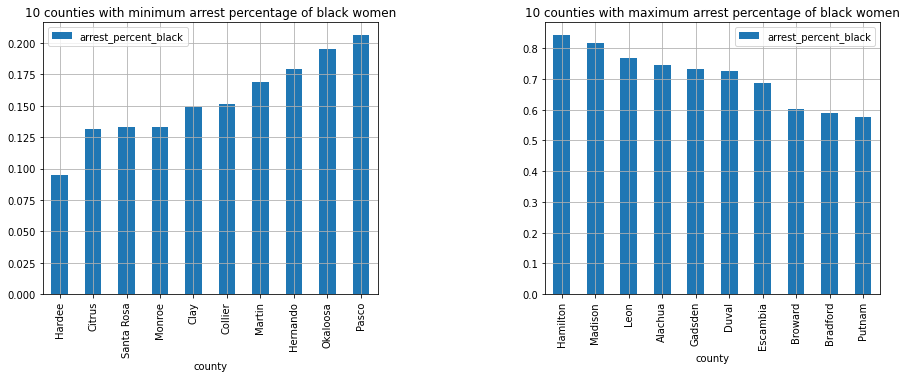

In [15]:
plot_graph(arr_comm, 'arrest_percent_black', limit, f'{limit} counties with minimum arrest percentage of black women',f'{limit} counties with maximum arrest percentage of black women')

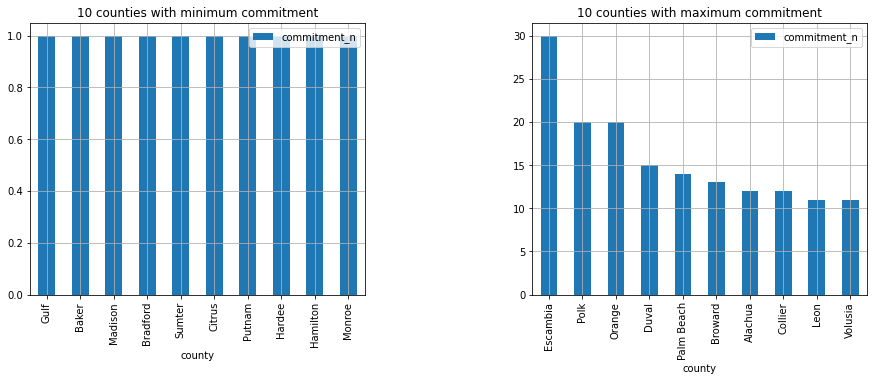

In [16]:
plot_graph(arr_comm, 'commitment_n', limit, f'{limit} counties with minimum commitment',f'{limit} counties with maximum commitment')

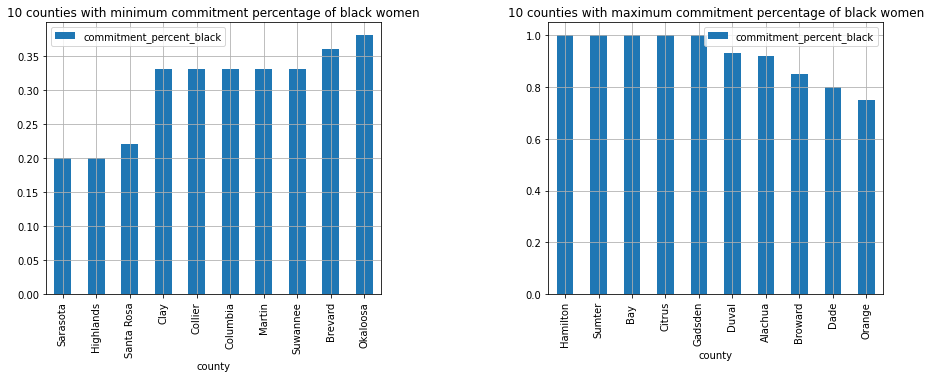

In [17]:
plot_graph(arr_comm, 'commitment_percent_black', limit, f'{limit} counties with minimum commitment percentage of black women',f'{limit} counties with maximum commitment percentage of black women')

#### Scatter plots for various combinations of:<br>a. percentage of black girls in general population <br>b. percentage of black girls arrested <br>c. percentage of black girls with commitment

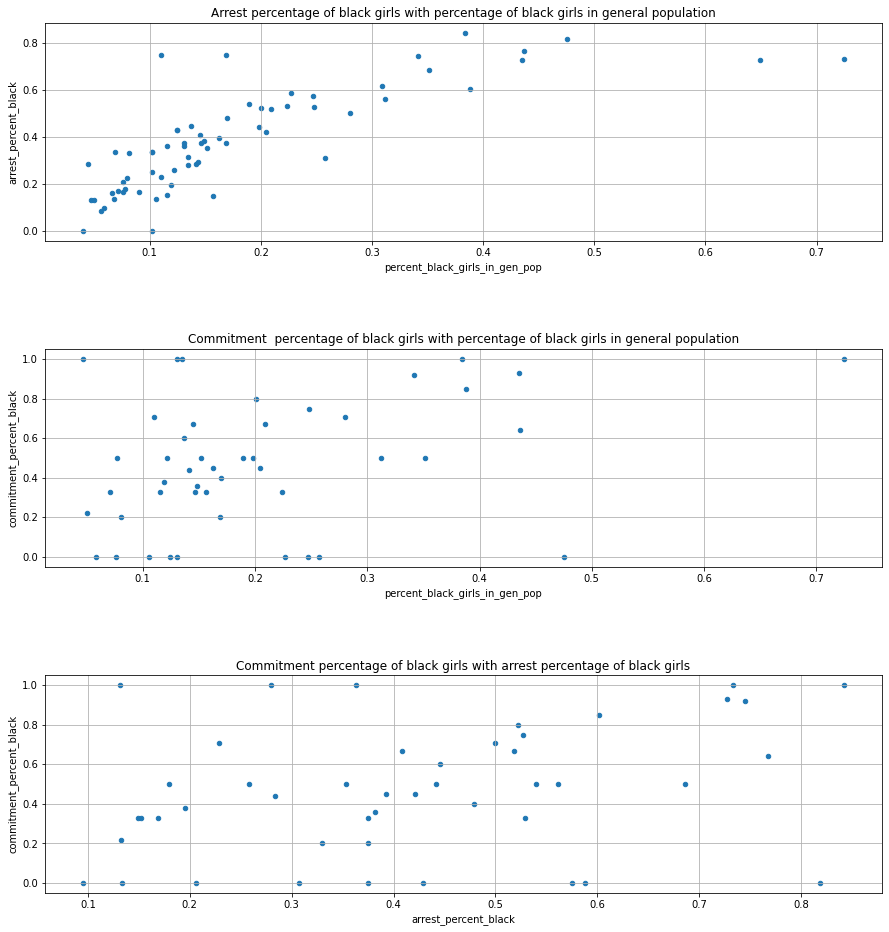

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(15, 16))
plt.subplots_adjust(hspace=0.5)

arr_comm.plot(ax=axes[0], grid=True, kind='scatter', x='percent_black_girls_in_gen_pop', y='arrest_percent_black', title='Arrest percentage of black girls with percentage of black girls in general population')
arr_comm.plot(ax=axes[1], grid=True, kind='scatter', x='percent_black_girls_in_gen_pop', y='commitment_percent_black', title='Commitment  percentage of black girls with percentage of black girls in general population')
arr_comm.plot(ax=axes[2], grid=True, kind='scatter', x='arrest_percent_black', y='commitment_percent_black', title='Commitment percentage of black girls with arrest percentage of black girls')
plt.show()

#### Distributions of:<br>a. percentage of black girls in general population <br>b. percentage of black girls arrested <br>c. percentage of black girls with commitment

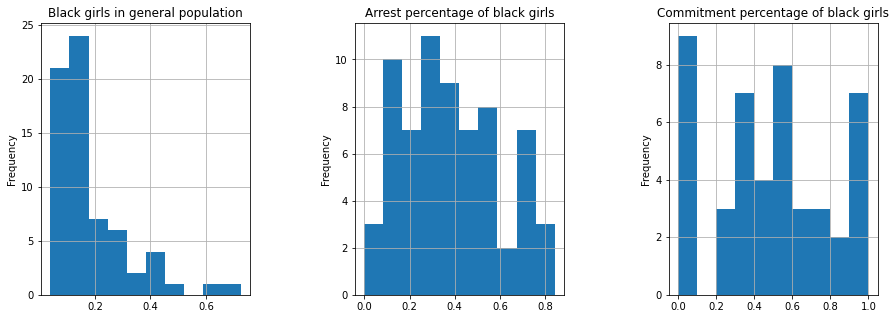

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.subplots_adjust(wspace=0.5)
arr_comm['percent_black_girls_in_gen_pop'].dropna().plot.hist(ax=axes[0], title='Black girls in general population', bins=10, grid=True)
arr_comm['arrest_percent_black'].dropna().plot.hist(ax=axes[1], title='Arrest percentage of black girls', bins=10, grid=True)
arr_comm['commitment_percent_black'].dropna().plot.hist(ax=axes[2], title='Commitment percentage of black girls', bins=10, grid=True)
plt.show()